
# Campaign for selling personal loans

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

-----------------------------------------------------------------------------------------------------------------------------

Columns of the datasets include

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage

Family - Family size of the customer
Education - education level of the customer

ID
Zip Code

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# import the common libraries for mathematical and data frames
import pandas as pd
import numpy as np

#statistical data libraries
from numpy import mean
from numpy import std

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff

# some useful stuff from stats scipy
import scipy.stats as stats 
from scipy.stats import shapiro

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#set the basic figure size and pallete
plt.figure(figsize=(10,15))

sns.set()
pal = sns.hls_palette(8, l=.3, s=.8)
sns.set_palette(pal)

<Figure size 720x1080 with 0 Axes>

In [5]:
#read data into a data frame and rename column names
dfPersonalLoans = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
dfPersonalLoans.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education",
                           "Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]


In [6]:
dfPersonalLoans.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
#check the number of rows, columns and dataypes of each column using the info()
dfPersonalLoans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Each Column Summary

ID column does not add any information to the dataset and to the target column


Personal Loan, Credit Card, Online, Securities Account, and CD Account are binary columns havin 0/1 values


Columns having the ranges are the Age, Experience, Mortgage, Income, CCAvg. These may form the distribution of data that can be seen using the normal distribution curve


Another numeric type columns having fixed values are the Education and Family - Oridnal coulmns


In [8]:
#drop ID column as it does not add any information to the dataset and is also NOT related to target column PersonalLoan
dfPersonalLoans.drop('ID', axis=1, inplace=True)
dfPersonalLoans.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
#see the shape of the dataset
dfPersonalLoans.shape

(5000, 13)

This gives that we have 5000 rows, 12 feature columns and 1 target dependent column (total 13 coulmns) in the given dataset

In [10]:
#check for any null values
dfPersonalLoans.isna().any()

Age                  False
Experience           False
Income               False
ZIPCode              False
Family               False
CCAvg                False
Education            False
Mortgage             False
PersonalLoan         False
SecuritiesAccount    False
CDAccount            False
Online               False
CreditCard           False
dtype: bool

There are no missing data in the dataset

# EXPLORATORY ANALYSIS

In [11]:
#get the basic statistic data of the compelte dataset
dfPersonalLoans.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Age column -> mean = median, and minimum value is 23 whereas the max values goes to 67. Data is not skewed

Experience Column -> Mean = Median here also, data is normally distributed. But few of Experience is having negative values, we will have to remove either those rows which have this Experience as negative or fill this data with Median as Expereience is a range column

Income Column -> Mean > Median and hence is positively skewed, see the diff of max-median and median - min, you will find the right difference > left difference. Will see the distribution and if possible can scale it between 0 and 1

CCAvg - This is also right skewed, mean > median. Will see the distribution and if possible can scale it between 0 and 1

Mortgage Column - median = 0, and mean > median, right skewed

-------------------------------------------------------------------------------------------------------------------------------

Let's find out the negative values of Experience column and their relation to the Personal Loan

In [12]:
# number of records that have Experience as negative
dfPersonalLoans[dfPersonalLoans['Experience'] < 0]['Experience'].count()

52

In [13]:
dfPersonalLoans[(dfPersonalLoans['Experience'] < 0) & (dfPersonalLoans['PersonalLoan'] == 1)].head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard


If you see above there are 52 rows having the negative experience, and for those 52 rows the PersonalLoan Column = 0. Since this is unbalanced dataset with respect to the target variable, we can go ahead and delete these rows as the count of data with Personal Loan = 1 is very less comapred to other side of the data.


In [14]:
dfPersonalLoans.drop(dfPersonalLoans[dfPersonalLoans.Experience < 0].index, inplace=True)
dfPersonalLoans[dfPersonalLoans['Experience'] < 0]['Experience'].count()

0

# Univariate Analysis

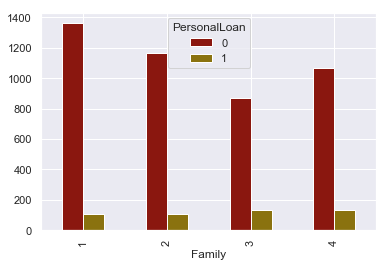

In [15]:
familyPL = pd.crosstab(dfPersonalLoans.Family, dfPersonalLoans.PersonalLoan)
familyPL.plot.bar()

Observation - Family vs Personal Loan

Closely looking at the graph above, we can see there is no impact of family size on personal loan except that higher family size are more likely to take loan

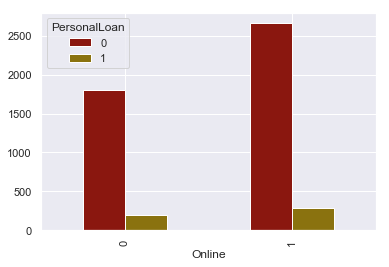

In [16]:
onlinePL = pd.crosstab(dfPersonalLoans.Online, dfPersonalLoans.PersonalLoan)
onlinePL.plot.bar()

Observation - Online vs Personal Loan

We see there is no high impact of people having online access to account on personal loan except that few online members tend to take loan

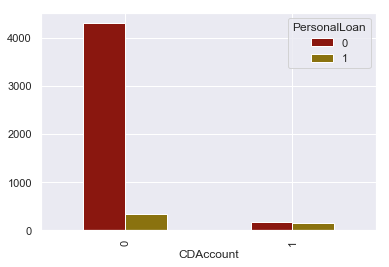

In [17]:
cdAccountPL = pd.crosstab(dfPersonalLoans.CDAccount, dfPersonalLoans.PersonalLoan)
cdAccountPL.plot.bar()

Observation - CDAccount vs Personal Loan

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

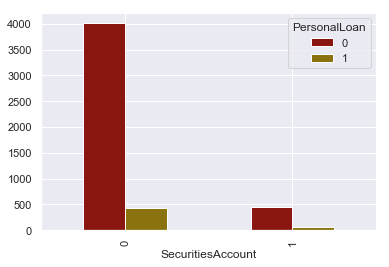

In [18]:
secutieisAccountPL = pd.crosstab(dfPersonalLoans.SecuritiesAccount, dfPersonalLoans.PersonalLoan)
secutieisAccountPL.plot.bar()

Observation - Securities Account vs Personal Loan

Clearly says that Customers who does not have loans have securities account

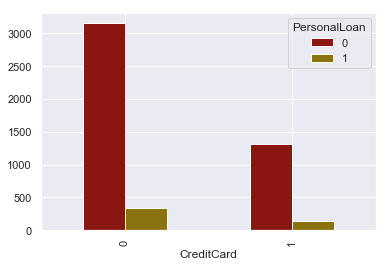

In [19]:
creditPL = pd.crosstab(dfPersonalLoans.CreditCard, dfPersonalLoans.PersonalLoan)
creditPL.plot.bar()

Observation - Credit Card vs Personal Loan

Customers who have credit card also may take personal loan, some relationship shown here

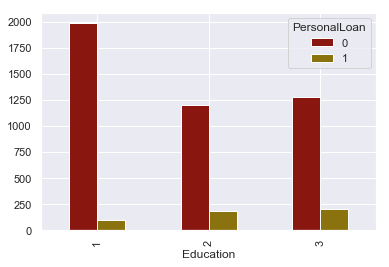

In [20]:
eduPL = pd.crosstab(dfPersonalLoans.Education, dfPersonalLoans.PersonalLoan)
eduPL.plot.bar()

Observation - Education vs Personal Loan

Customers have higher education, take more personal loan as visible from the above graph clearly

# Multivariate Analysis

Influence of income and education on personal loan

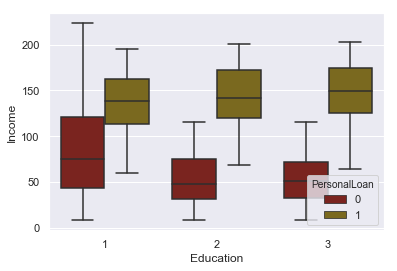

In [21]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=dfPersonalLoans)

Custoemrs having less Education have more income copmared to higher experienced customers.
Also closer look tells that irrespective of Education level, same income group people take personal loans

Influence of education and mortgage on personal loan

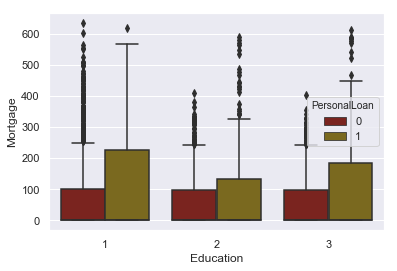

In [22]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=dfPersonalLoans)

Lower education implies higher personal loan count

Mortgage is same for customers having or not having personal loan

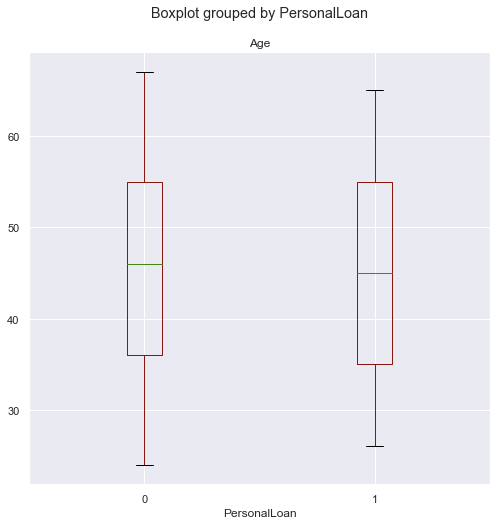

In [23]:
dfPersonalLoans.boxplot(column="Age",        # Column to plot
                 by= "PersonalLoan",         # Column to split upon
                 figsize= (8,8))        # Figure size

Customers of younger age take more personal loans.

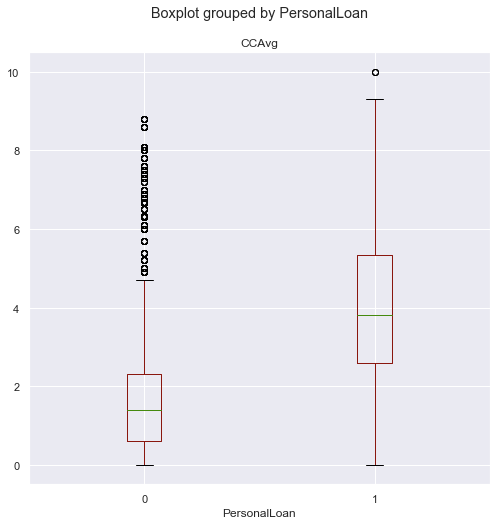

In [24]:
dfPersonalLoans.boxplot(column="CCAvg",        # Column to plot
                 by= "PersonalLoan",         # Column to split upon
                 figsize= (8,8))        # Figure size

Observation - Customers who have personal loan have a higher credit card average.

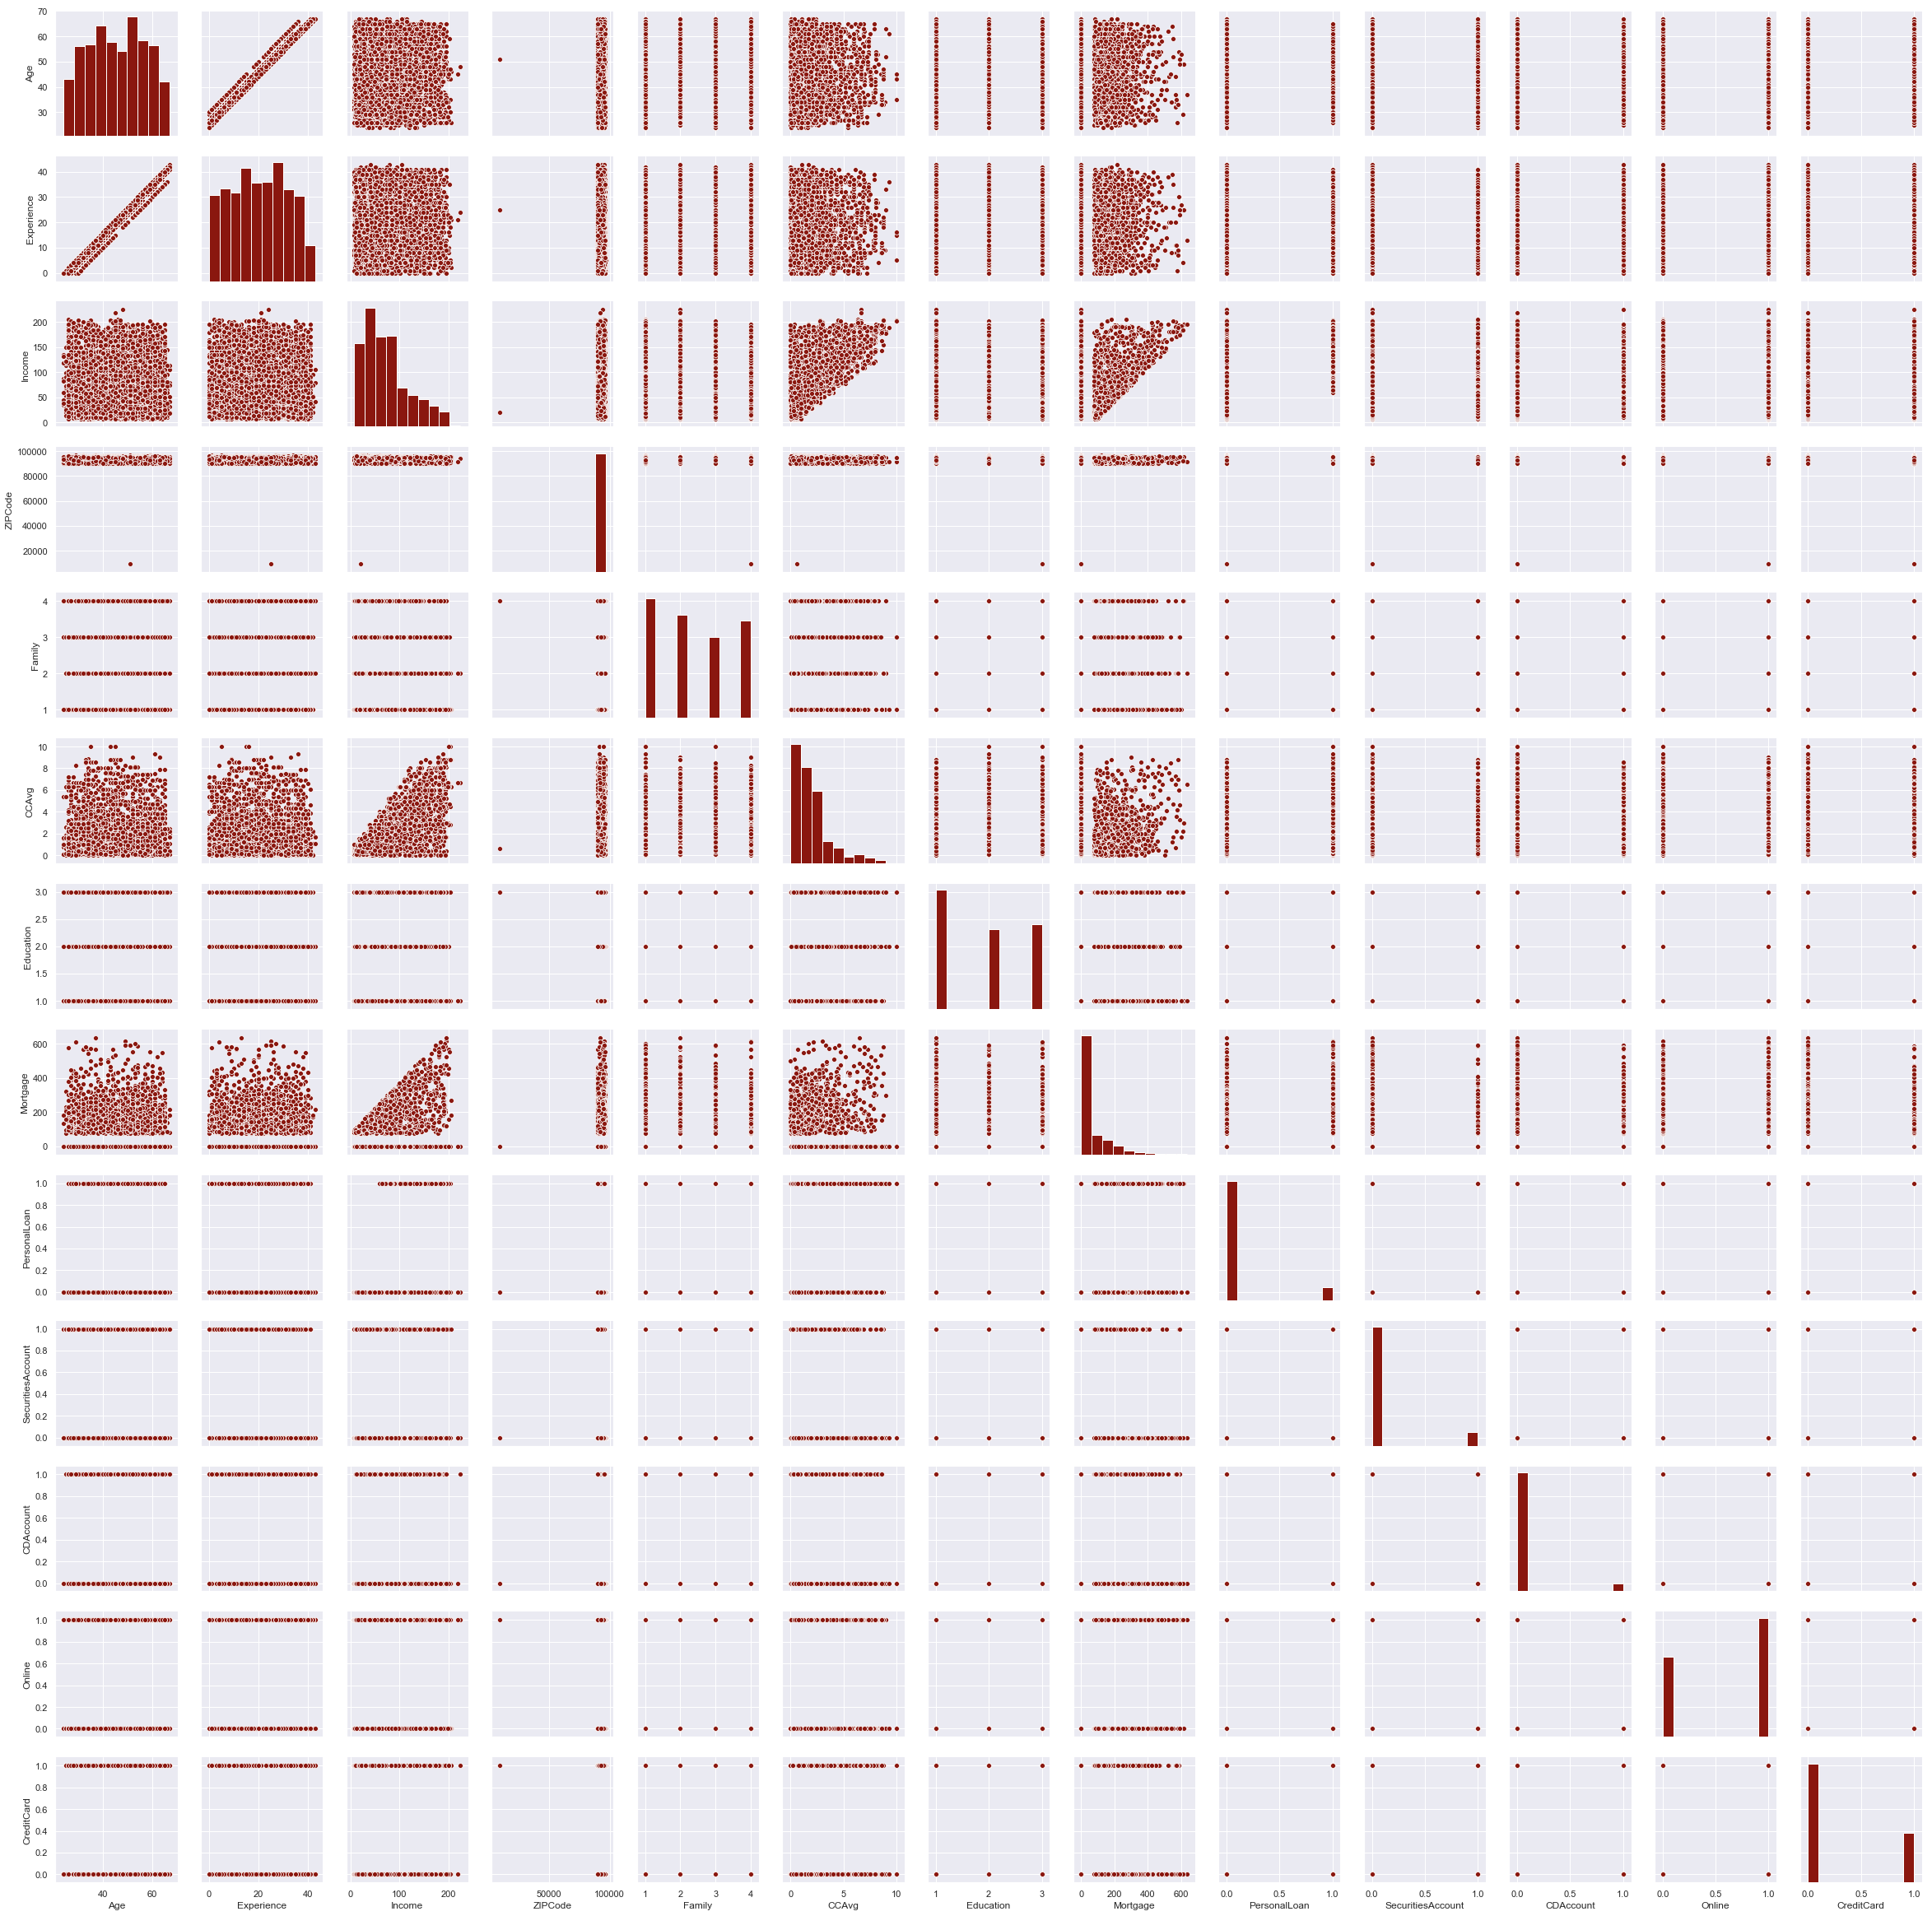

In [25]:
# create a pair plot using sns to identify the distribution of data between two values 
#multiple pairwise bivariate distributions 

# sns.pairplot(dfPersonalLoans[['PersonalLoan','Age','Experience','Income','CCAvg','Mortgage']])
sns.pairplot(dfPersonalLoans)

CCAvg and Mortgage show right skewed data

Eexperience and Age have a positive correlation. As experience increase age also increases.

# About the Target Column

In [26]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
dfPersonalLoans.groupby(["PersonalLoan"])["PersonalLoan"].count()

PersonalLoan
0    4468
1     480
Name: PersonalLoan, dtype: int64

Highly unbalanced data

To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a 0 Perosnal Loan

Personal Loan as pie chart:


Text(0, 0.5, '')

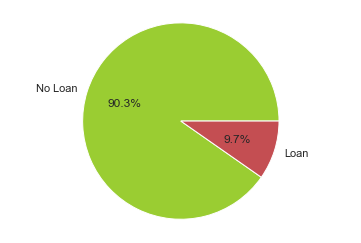

In [27]:
# Check Personal Loan variables that has 0 value for No Loan and 1 for Loan Taken
print("Personal Loan as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(dfPersonalLoans["PersonalLoan"].value_counts(),autopct='%1.1f%%', labels=['No Loan','Loan'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

9.7% of the data contains the target column Personal Loan = 1, and rest 90.3% of the data has target column Personal Loan = 0

# Chi-Square Test

In [28]:
test_columns=['Age','ZIPCode','Income','Experience','Family','SecuritiesAccount',
              'Education','CDAccount', 'Online', 'CreditCard','CCAvg','Mortgage']

for col in test_columns:
    print('============================== {} Column =============================='.format(col))
    X=dfPersonalLoans[col].astype('str')
    #print(X)
    y=dfPersonalLoans['PersonalLoan'].astype('str')
    
    pivot_df = pd.crosstab(X,y)
    chi2, p, dof, expected = stats.chi2_contingency(pivot_df.values)
    if(p<0.05):
        print('P Value is {0:15f}'.format(p))
        print("The featured column \"%s\" is Statistically Significant"%(col))
    else:
        print('P Value is {0:15f}'.format(p))
        print("The featured column \"%s\" is not Statistically Significant"%(col))
    print('============================== End ==============================\n')


============================== Age Column ==============================
P Value is        0.212929
The featured column "Age" is not Statistically Significant
============================== End ==============================

============================== ZIPCode Column ==============================
P Value is        0.758802
The featured column "ZIPCode" is not Statistically Significant
============================== End ==============================

============================== Income Column ==============================
P Value is        0.000000
The featured column "Income" is Statistically Significant
============================== End ==============================

============================== Experience Column ==============================
P Value is        0.818470
The featured column "Experience" is not Statistically Significant
============================== End ==============================

============================== Family Column ===========================

Based on above investigation - Age, ZIPCode, Experience, SecuritiesAccount, Online, and CreditCard columns are not Statistically Significant

So once we have the model metrics calculated using all columns, we can go ahead and remove these sets of columns to create a model and evaluate the metrics

This will help in comparing how model fares with and without columns which are Statistically Significant or Not

# Let's start the model building, which involves different steps, given below.

Will create functions to avoid redundant code writing

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# DATASET PARTITION

In [30]:
# this funtion helps to do a split for train and test data. It takes input as a dataframe 
# and a list of columns that may be needed to drop based om their relationship with the target variable
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    y = df['PersonalLoan'].values #target
    X = df.drop(['PersonalLoan'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

# FITTING and EVALUATING MODELS

In [31]:
# model fitting
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('Train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))
    return y_pred, y_pred_prob

In [32]:
# drawing roc curve
def roc_curve_draw(fpr, tpr, thr):
    # drawing roc curve
    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
          "and a specificity of %.3f" % (1-fpr[idx]) + 
          ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# VALIDATING MODELS

In [33]:
def print_scores(y_test,y_pred,y_pred_prob):
    print("Accuracy score: \n", accuracy_score(y_test,y_pred))
    print('Test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("Classification report:" "\n", classification_report(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In below models list, not including SVM, as it takes lot of time making notebook unresponsive.

For SVM I will be running it seperately outside this loop

============================== KNeighborsClassifier Model Starts ==============================
Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
Train-set confusion matrix:
 [[3510   64]
 [ 224  160]]
============================== KNeighborsClassifier Model Evaluation ==============================
Accuracy score: 
 0.8909090909090909
Test-set confusion matrix:
 [[859  35]
 [ 73  23]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       894
           1       0.40      0.24      0.30        96

   micro avg       0.89      0.89      0.89       990
   macro avg       0.66      0.60      0.62       990
weighted avg       0.87      0.89      0.88       990

ROC AUC: 0.804285514541387


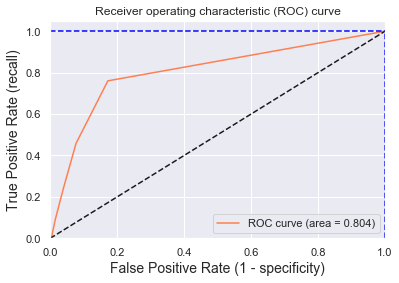

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.
============================== KNeighborsClassifier Model Ends ==============================


============================== LogisticRegression Model Starts ==============================
Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
Train-set confusion matrix:
 [[3468  106]
 [ 262  122]]
============================== LogisticRegression Model Evaluation ==============================
Accuracy score: 
 0.9090909090909091
Test-set confusion matrix:
 [[867  27]
 [ 63  33]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       894
           1       0.55      0.34      0.42        96

   micro avg       0.91      0.91      0.91     

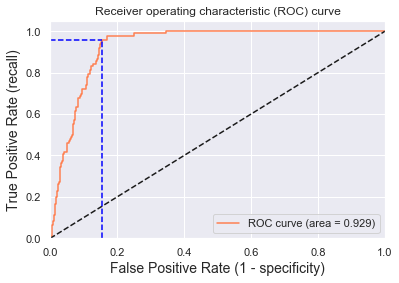

Using a threshold of 0.094 guarantees a sensitivity of 0.958 and a specificity of 0.847, i.e. a false positive rate of 15.32%.
============================== LogisticRegression Model Ends ==============================


============================== Naive Baye Classifier Model Starts ==============================
Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
Train-set confusion matrix:
 [[3299  275]
 [ 147  237]]
============================== Naive Baye Classifier Model Evaluation ==============================
Accuracy score: 
 0.8787878787878788
Test-set confusion matrix:
 [[822  72]
 [ 48  48]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       894
           1       0.40      0.50      0.44        96

   micro avg       0.88      0.88      0.88  

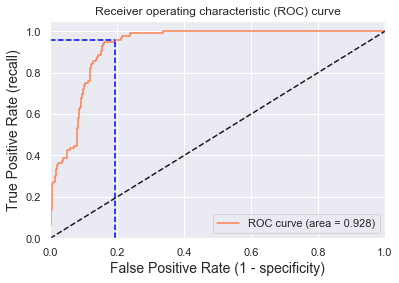

Using a threshold of 0.010 guarantees a sensitivity of 0.958 and a specificity of 0.808, i.e. a false positive rate of 19.24%.
============================== Naive Baye Classifier Model Ends ==============================




In [34]:
drop_list = [] #to drop columns not affecting the model output
models = []

models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Baye Classifier', GaussianNB()))

for i,v in models:
    print('============================== {} Model Starts =============================='.format(i))
    X_train, X_test, y_train, y_test = split_data(dfPersonalLoans, drop_list)
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred,y_pred_prob)
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_prob[:,1])
    roc_curve_draw(fpr, tpr, thr)
    print('============================== {} Model Ends =============================='.format(i))
    print('\n')

============================== SVM Linear Model Starts ==============================
Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')
Train-set confusion matrix:
 [[3479   95]
 [ 258  126]]
============================== SVM Linear Model Evaluation ==============================
Accuracy score: 
 0.9111111111111111
Test-set confusion matrix:
 [[869  25]
 [ 63  33]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       894
           1       0.57      0.34      0.43        96

   micro avg       0.91      0.91      0.91       990
   macro avg       0.75      0.66      0.69       990
weighted avg       0.90      0.91      0.90       990

ROC AUC: 0.9336083146905294


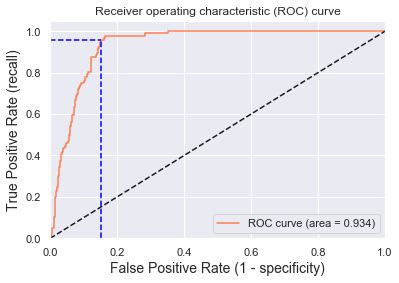

Using a threshold of 0.068 guarantees a sensitivity of 0.958 and a specificity of 0.848, i.e. a false positive rate of 15.21%.
============================== SVM Linear Model Ends ==============================




In [35]:
# sperating the SVM as notebook hangs when running SVM models in same list of other models...

drop_list = [] #to drop columns not affecting the model output
modelsSVM = []

modelsSVM.append(('SVM Linear', svm.SVC(kernel='linear',probability=True)))
# modelsSVM.append(('SVM RBF', svm.SVC(kernel='rbf',probability=True)))

for i,v in modelsSVM:
    print('============================== {} Model Starts =============================='.format(i))
    X_train, X_test, y_train, y_test = split_data(dfPersonalLoans, drop_list)
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred,y_pred_prob)
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_prob[:,1])
    roc_curve_draw(fpr, tpr, thr)
    print('============================== {} Model Ends =============================='.format(i))
    print('\n')
    

# Summary Report - when all columns are considered

For unbalanced data we cannot rely on the accuracy score. The best measure is the ROC value as the target data is binary in nature

In the ROC curve we look at:
TPR (True Positive Rate) = # True positives / # positives = Recall = TP / (TP+FN)
FPR (False Positive Rate) = # False Positives / # negatives = FP / (FP+TN)

First thing is that this data is not such that if we predict something wrong, i.e. RECALL is higher then we need to woryy about it, as RECALL is more taken care when we talk about life and death matters. We should not predict true class as false negative

With a large number of negative samples (PersonalLoan = 0) — precision is probably better in an unbalanced datasets
If the number of negative samples is very large the false positive rate increases more slowly. Because the true negatives (in the fpr denominator — (FP+TN)) would probably be very high and make this metric smaller.
Precision however, is not affected by a large number of negative samples, that’s because it measures the number of true positives out of the samples predicted as positives (TP+FP).


1. KNN (ROC = 0.804), NaiveBayes (ROC = 0.927), Logistic (ROC = 0.929) and SVM (0.933)
Based on this data, we can clearly see that Logistic and SVM perform much better. Now we should see the confusion matrix/ precision and recall for both of them to finalize which among these two is better

2. Precision of SVM is much better than Logistics, and its not that we should consider ROC model as the final conclusion point. Here looking at confusion matrics data, SVM performs better


# SVM works well as ROC is approx 93.3% and Sensitivity is 95.8%

----------------------------------------------------------------------------------------------------------------------------

# Remove Columns which dont give impact to PersonalLoan


Let's remove columns ZIPCode, Age, CreditCard, Online, SecuritiesAccount, Experience which are not Statiscally Significant as per the Chi square test

============================== KNeighborsClassifier Model Starts ==============================
Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan',
       'CDAccount'],
      dtype='object')
Train-set confusion matrix:
 [[3534   40]
 [ 156  228]]
============================== KNeighborsClassifier Model Evaluation ==============================
Accuracy score: 
 0.9343434343434344
Test-set confusion matrix:
 [[876  18]
 [ 47  49]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.73      0.51      0.60        96

   micro avg       0.93      0.93      0.93       990
   macro avg       0.84      0.75      0.78       990
weighted avg       0.93      0.93      0.93       990

ROC AUC: 0.9215604026845637


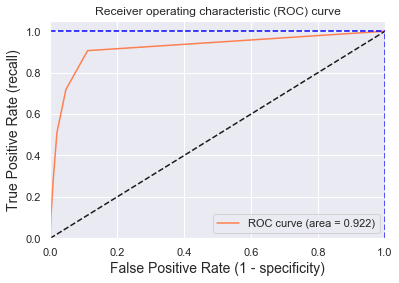

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.
============================== KNeighborsClassifier Model Ends ==============================


============================== LogisticRegression Model Starts ==============================
Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan',
       'CDAccount'],
      dtype='object')
Train-set confusion matrix:
 [[3533   41]
 [ 166  218]]
============================== LogisticRegression Model Evaluation ==============================
Accuracy score: 
 0.9434343434343434
Test-set confusion matrix:
 [[877  17]
 [ 39  57]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.77      0.59      0.67        96

   micro avg       0.94      0.94      0.94       990
   macro avg       0.86      0.79      0.82       990
weighted avg       0.94 

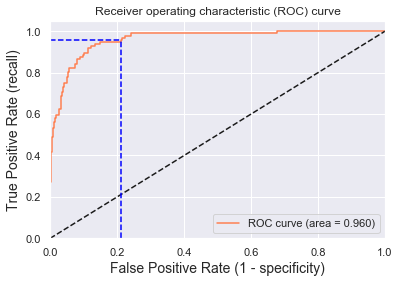

Using a threshold of 0.057 guarantees a sensitivity of 0.958 and a specificity of 0.789, i.e. a false positive rate of 21.14%.
============================== LogisticRegression Model Ends ==============================


============================== Naive Baye Classifier Model Starts ==============================
Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan',
       'CDAccount'],
      dtype='object')
Train-set confusion matrix:
 [[3279  295]
 [ 150  234]]
============================== Naive Baye Classifier Model Evaluation ==============================
Accuracy score: 
 0.8737373737373737
Test-set confusion matrix:
 [[818  76]
 [ 49  47]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       894
           1       0.38      0.49      0.43        96

   micro avg       0.87      0.87      0.87       990
   macro avg       0.66      0.70      0.68       990
weighted avg       0.

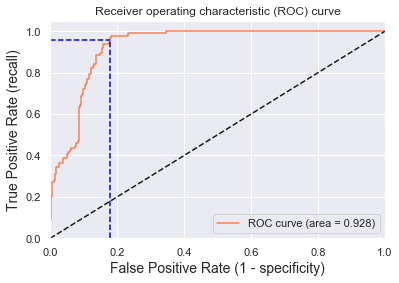

Using a threshold of 0.013 guarantees a sensitivity of 0.958 and a specificity of 0.821, i.e. a false positive rate of 17.90%.
============================== Naive Baye Classifier Model Ends ==============================




In [36]:
drop_list = ['Age','ZIPCode','CreditCard','Online','SecuritiesAccount','Experience'] 

for i,v in models:
    print('============================== {} Model Starts =============================='.format(i))
    X_train, X_test, y_train, y_test = split_data(dfPersonalLoans, drop_list)
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred,y_pred_prob)
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_prob[:,1])
    roc_curve_draw(fpr, tpr, thr)
    print('============================== {} Model Ends =============================='.format(i))
    print('\n')

============================== SVM Linear Model Starts ==============================
Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan',
       'CDAccount'],
      dtype='object')
Train-set confusion matrix:
 [[3532   42]
 [ 164  220]]
============================== SVM Linear Model Evaluation ==============================
Accuracy score: 
 0.9464646464646465
Test-set confusion matrix:
 [[880  14]
 [ 39  57]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       894
           1       0.80      0.59      0.68        96

   micro avg       0.95      0.95      0.95       990
   macro avg       0.88      0.79      0.83       990
weighted avg       0.94      0.95      0.94       990

ROC AUC: 0.9576342281879194


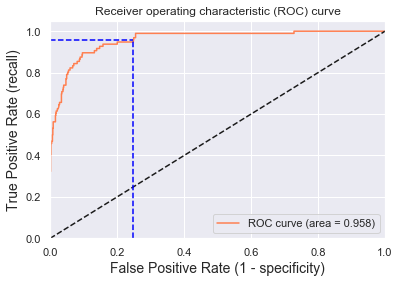

Using a threshold of 0.032 guarantees a sensitivity of 0.958 and a specificity of 0.752, i.e. a false positive rate of 24.83%.
============================== SVM Linear Model Ends ==============================




In [37]:
# let's remove columns Zip Code, Online and try SVM
for i,v in modelsSVM:
    print('============================== {} Model Starts =============================='.format(i))
    X_train, X_test, y_train, y_test = split_data(dfPersonalLoans, drop_list)
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred,y_pred_prob)
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_prob[:,1])
    roc_curve_draw(fpr, tpr, thr)
    print('============================== {} Model Ends =============================='.format(i))
    print('\n')

1. KNN (ROC = 0.934), NaiveBayes (ROC = 0.927), Logistic (ROC = 0.960) and SVM (0.957)
Based on this data, we can clearly see that Logistic perform much better. Now we should see the confusion matrix/ precision and recall also

2. Precision of SVM is much better than Logistics, and its not that we should consider ROC model. Here looking at confusion matrics data, SVM performs better


# SVM works well when removing some non significant columns as ROC is approx 95.7% and Sensitivity is 95.8%

-----------------------------------------------------------------------------------------------------------------------------

# Summary Report

SVM performs better than any other models. We can consider Logistic also if we have computation issues with SVM, as Logistic also nears SVM in metrics.
Preference of Logistic for binary classification data is also considered good. 

Other two Naive Bayes and KNN dont perform better and can be ignored here